In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [15]:
df = pd.read_csv("../../data/precios_coches.csv")
df

,Modelo,Kilometraje,Precio venta,Edad
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


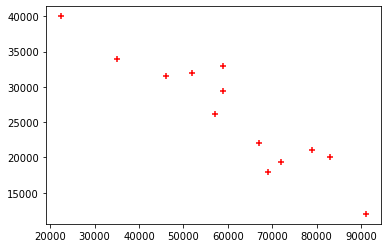

In [16]:
# trazamos el grafico de dispersion

plt.scatter(df["Kilometraje"], df["Precio venta"], color='red', marker='+')

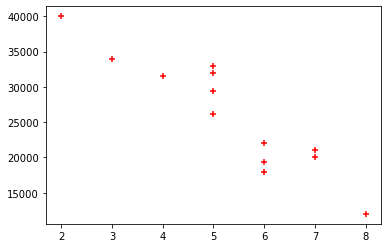

In [17]:
plt.scatter(df["Edad"], df["Precio venta"], color='red', marker='+')

In [20]:
# Creamos el hot encoding
dummies = pd.get_dummies(df.Modelo)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [21]:
# Concatenamos el hot encoding con el dataset
merged = pd.concat([df, dummies], axis='columns')
merged

,Modelo,Kilometraje,Precio venta,Edad,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [23]:
# Eliminamos la columna Modelo
final = merged.drop(['Modelo'], axis='columns')
final

,Kilometraje,Precio venta,Edad,Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [25]:
final = final.drop(['Mercedez Benz C class'], axis='columns')

final

,Kilometraje,Precio venta,Edad,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [26]:
# Características y etiquetas, X y y respectivamente
X = final.drop(['Precio venta'], axis='columns')  # Características
X

,Kilometraje,Edad,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [29]:
# Variable objetivo
y = final['Precio venta']  # Etiquetas
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Precio venta, dtype: int64

In [30]:
model = LinearRegression()

In [31]:
# Entrenamos el modelo
model.fit(X, y)

LinearRegression()

In [34]:
model.predict([[45000, 4, 0, 0]])

C:\Users\sergi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [36]:
model.predict([[86000, 7, 0, 1]])


C:\Users\sergi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [37]:
# score
print(model.score(X, y))

0.9417050937281083
